In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt


In [14]:
# Leer datos
clientes_df = pd.read_csv("data/small-vrp/vrp.csv", sep=";")
vehiculos_df = pd.read_csv("data/small-vrp/2.vehicles.csv", sep=";")


In [15]:
# Separar depósito y clientes
depot = clientes_df[clientes_df["ID"] == 0].iloc[0]
clientes = clientes_df[clientes_df["ID"] != 0].copy()

In [16]:
# Función para calcular distancias
def distancia(p1, p2):
    return sqrt((p1["X"] - p2["X"])**2 + (p1["Y"] - p2["Y"])**2)

In [17]:
# Matriz de distancias
nodos = clientes_df.copy()
dist_matrix = np.zeros((len(nodos), len(nodos)))
for i in range(len(nodos)):
    for j in range(len(nodos)):
        dist_matrix[i, j] = distancia(nodos.iloc[i], nodos.iloc[j])


In [18]:
# Algoritmo vecino más cercano con restricción de capacidad
def resolver_vrp(clientes, depot, vehiculos):
    rutas = []
    clientes_pendientes = clientes.copy()
    clientes_pendientes["Visitado"] = False

    for index, vehiculo in vehiculos.iterrows():
        capacidad_restante = vehiculo["Capacity"]
        ruta = [0]  # Inicia en el depósito
        actual = 0  # ID del nodo actual (0 = depósito)

        while True:
            candidatos = clientes_pendientes[~clientes_pendientes["Visitado"]]
            candidatos = candidatos[candidatos["Demand"] <= capacidad_restante]

            if candidatos.empty:
                break

            # Elegir el cliente más cercano
            candidatos["Distancia"] = candidatos.apply(lambda x: dist_matrix[actual, x["ID"]], axis=1)
            siguiente = candidatos.loc[candidatos["Distancia"].idxmin()]
            
            # Actualizar estado
            ruta.append(siguiente["ID"])
            clientes_pendientes.loc[clientes_pendientes["ID"] == siguiente["ID"], "Visitado"] = True
            capacidad_restante -= siguiente["Demand"]
            actual = int(siguiente["ID"])

        ruta.append(0)  # Regresar al depósito
        rutas.append(ruta)

    return rutas

In [19]:
# Resolver
rutas = resolver_vrp(clientes, depot, vehiculos_df)
print("Rutas encontradas:", rutas)


Rutas encontradas: [[0, np.int64(3), np.int64(5), np.int64(7), np.int64(6), np.int64(1), np.int64(9), 0], [0, np.int64(2), np.int64(10), np.int64(8), 0]]


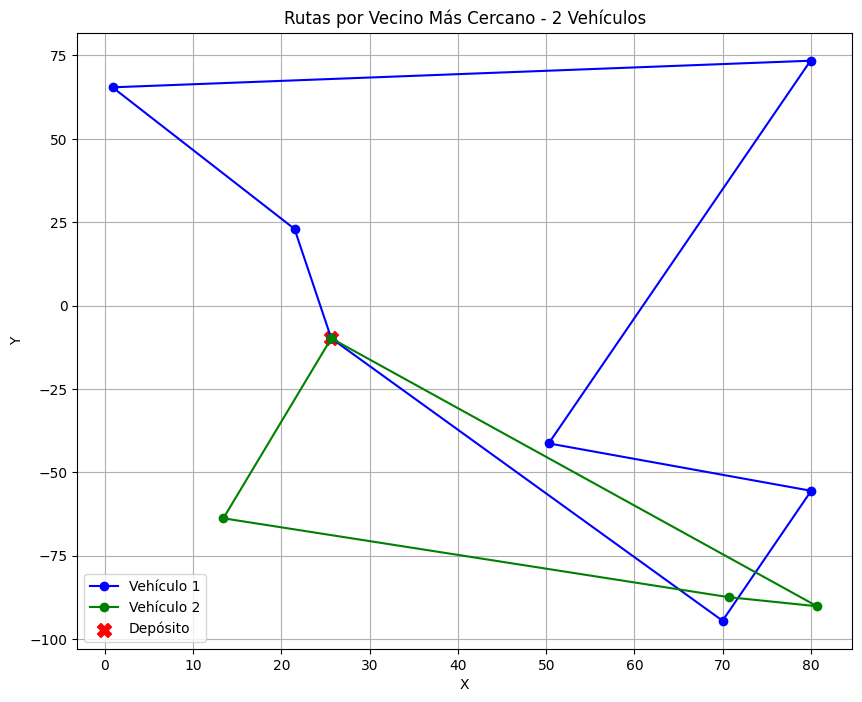

In [20]:
# Visualización
def graficar_rutas(rutas, clientes, depot):
    colores = ["blue", "green", "orange", "purple", "brown"]
    plt.figure(figsize=(10, 8))

    for i, ruta in enumerate(rutas):
        xs, ys = [], []
        for nodo_id in ruta:
            if nodo_id == 0:
                x, y = depot["X"], depot["Y"]
            else:
                cliente = clientes[clientes["ID"] == nodo_id].iloc[0]
                x, y = cliente["X"], cliente["Y"]
            xs.append(x)
            ys.append(y)
        plt.plot(xs, ys, marker="o", label=f"Vehículo {i+1}", color=colores[i % len(colores)])
        # Dibujar depósito
    
    plt.scatter(depot["X"], depot["Y"], c="red", s=100, marker="X", label="Depósito")
    plt.title("Rutas por Vecino Más Cercano - 2 Vehículos")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.show()

graficar_rutas(rutas, clientes, depot)
